# 3. Process Brown Dwarf Atmospheric Parameters 

In the following steps, you will:

- Load the brown dwarf dataset used to train the ML models.
- Prepare the X and y variables to deploy the trained ML models.
- Visualize them for a few cases.

We will need the following modules from `TelescopeML`:

- **DataMaster**: to prepare the synthetic brown dwarf dataset and load the trained machine learning (ML) models.
- **StatVisAnalyzer**: to provide statistical tests and plotting functions.
- **IO_utils**: to provide functions to load the trained ML models.


In [1]:
from TelescopeML.DataMaster import *
from TelescopeML.Predictor import *
from TelescopeML.StatVisAnalyzer import *

Loading BokehJS ...

Loading BokehJS ...

<img src="../figures/data_process.jpg"
     alt="ML pipeline"
     style="float: left; margin-right: 10px; width: 40%;" />


## 2.1 Load the Synthetic spectra - training dataset 

We computed a low-resolution spectrum ($R$=200) utilizing atmopshric brown dwarfs grid model, [*Sonora-Bobcat*](https://arxiv.org/pdf/2107.07434.pdf) for spectral range $\sim$0.9-2.4 $\mu m$. An open-source atmospheric radiative transfer Python package, [*PICASO*](https://natashabatalha.github.io/picaso/) was employed for generating these datasets. This dataset encompass 30,888 synthetic spectra (or instances or rows). 


Each spectrum has 104 wavelengths (i.e., 0.897, 0.906, ..., 2.512 μm) and 4 output atmospheric parameters:

- gravity (log *g*)
- temperature (*T*<sub>eff</sub>)
- carbon-to-oxygen ratio (C/O)
- metallicity ([M/H])

In [2]:
import os 

__reference_data_path__ = os.getenv("TelescopeML_reference_data")
__reference_data_path__ 


# Note: insert the directory of the reference_data if you get an error reading the reference data!!!
# __reference_data_path__ = 'INSERT_DIRECTORY_OF_reference_data'


'/Users/sarah/Downloads/reference_data/'

 Load the dataset and check few instances 

In [3]:
train_BD = pd.read_csv(os.path.join(__reference_data_path__, 
                                    'training_datasets', 
                                    'browndwarf_R100_v4_newWL_v3.csv.bz2'), compression='bz2')
train_BD.head(5)

,gravity,temperature,c_o_ratio,metallicity,2.512,2.487,2.462,2.438,2.413,2.389,...,0.981,0.971,0.962,0.952,0.943,0.933,0.924,0.915,0.906,0.897
0,5.0,1100,0.25,-1.0,9.103045e-08,1.181658e-07,1.307868e-07,1.269229e-07,1.159179e-07,8.925110e-08,...,1.257751e-07,9.640859e-08,7.612550e-08,6.901364e-08,6.247359e-08,4.112384e-08,5.127995e-08,4.897355e-08,4.087795e-08,2.791689e-08
1,5.0,1100,0.25,-0.7,9.103045e-08,1.181658e-07,1.307868e-07,1.269229e-07,1.159179e-07,8.925110e-08,...,1.257751e-07,9.640859e-08,7.612550e-08,6.901364e-08,6.247359e-08,4.112384e-08,5.127995e-08,4.897355e-08,4.087795e-08,2.791689e-08
2,5.0,1100,0.25,-0.5,9.103045e-08,1.181658e-07,1.307868e-07,1.269229e-07,1.159179e-07,8.925110e-08,...,1.257751e-07,9.640859e-08,7.612550e-08,6.901364e-08,6.247359e-08,4.112384e-08,5.127995e-08,4.897355e-08,4.087795e-08,2.791689e-08
3,5.0,1100,0.25,-0.3,9.103045e-08,1.181658e-07,1.307868e-07,1.269229e-07,1.159179e-07,8.925110e-08,...,1.257751e-07,9.640859e-08,7.612550e-08,6.901364e-08,6.247359e-08,4.112384e-08,5.127995e-08,4.897355e-08,4.087795e-08,2.791689e-08
4,5.0,1100,0.25,0.0,9.103045e-08,1.181658e-07,1.307868e-07,1.269229e-07,1.159179e-07,8.925110e-08,...,1.257751e-07,9.640859e-08,7.612550e-08,6.901364e-08,6.247359e-08,4.112384e-08,5.127995e-08,4.897355e-08,4.087795e-08,2.791689e-08


### 2.1.2 Check atmospheric parameters


- gravity (log *g*)
- temperature (*T*<sub>eff</sub>)
- carbon-to-oxygen ratio (C/O)
- metallicity ([M/H])

In [4]:
output_names = ['gravity', 'temperature', 'c_o_ratio', 'metallicity']
train_BD[output_names].head()

,gravity,temperature,c_o_ratio,metallicity
0,5.0,1100,0.25,-1.0
1,5.0,1100,0.25,-0.7
2,5.0,1100,0.25,-0.5
3,5.0,1100,0.25,-0.3
4,5.0,1100,0.25,0.0


In [5]:
# training_features_labels: they are Wavelengths variables in string format

wavelength_names = [item for item in train_BD.columns.to_list() if item not in output_names]
wavelength_names[:5]

['2.512', '2.487', '2.462', '2.438', '2.413']

In [6]:
# training_features_wl: they are Wavelengths variables 

wavelength_values = [float(item) for item in wavelength_names]
wavelength_values[:10]

[2.512, 2.487, 2.462, 2.438, 2.413, 2.389, 2.366, 2.342, 2.319, 2.296]

### 2.1.3 Prepare Inputs and outputs for ML models (X,y)
- X: 104 column variables or fluxes
- y: output variables: 'gravity', 'temperature',  'c_o_ratio', 'metallicity'

In [7]:
# Training feature variables
X = train_BD.drop(
    columns=['gravity', 
             'temperature', 
             'c_o_ratio', 
             'metallicity'])


# Target/Output feature variables
y = train_BD[['gravity', 'c_o_ratio', 'metallicity', 'temperature', ]]


log-transform the 'temperature' variable toreduce the skewness of the data, making it more symmetric and normal-like for the ML model


In [8]:
y.loc[:, 'temperature'] = np.log10(y['temperature'])

In [9]:
# check the output variables
y.head()

,gravity,c_o_ratio,metallicity,temperature
0,5.0,0.25,-1.0,3.041393
1,5.0,0.25,-0.7,3.041393
2,5.0,0.25,-0.5,3.041393
3,5.0,0.25,-0.3,3.041393
4,5.0,0.25,0.0,3.041393


---

## 2.2 Processing the Data

Here we instintiate BuildRegressorCNN class from DeepBuilder module to prepare the datasets and take the trained CNN (Convolutional Neural Networks) for us:

- Take the synthetic spectra
- Process them, e.g.
    - Divide them to three sets: train, validation, and test sets
    - Scale y variables
    - Scale X variables
    - Create new features 
    

### 2.2.1 Instintiate DataProcessor class from DeepBuilder module

In [10]:
data_processor = DataProcessor( 
                             flux_values=X.to_numpy(),
                             wavelength_names=X.columns,
                             wavelength_values=wavelength_values,
                             output_values=y.to_numpy(),
                             output_names=output_names,
                             spectral_resolution=200,
                             trained_ML_model=None,
                             trained_ML_model_name='CNN',
                                )

### 2.2.2 Split the dataset into train, validate and test sets

In [11]:
data_processor.split_train_validation_test(test_size=0.1, 
                                             val_size=0.1, 
                                             random_state_=42,)

### 2.2.3 Standardize X Variables Row-wise 

In [12]:
# Scale the X features using MinMax Scaler
data_processor.standardize_X_row_wise(output_indicator='Trained_StandardScaler_X_RowWise')

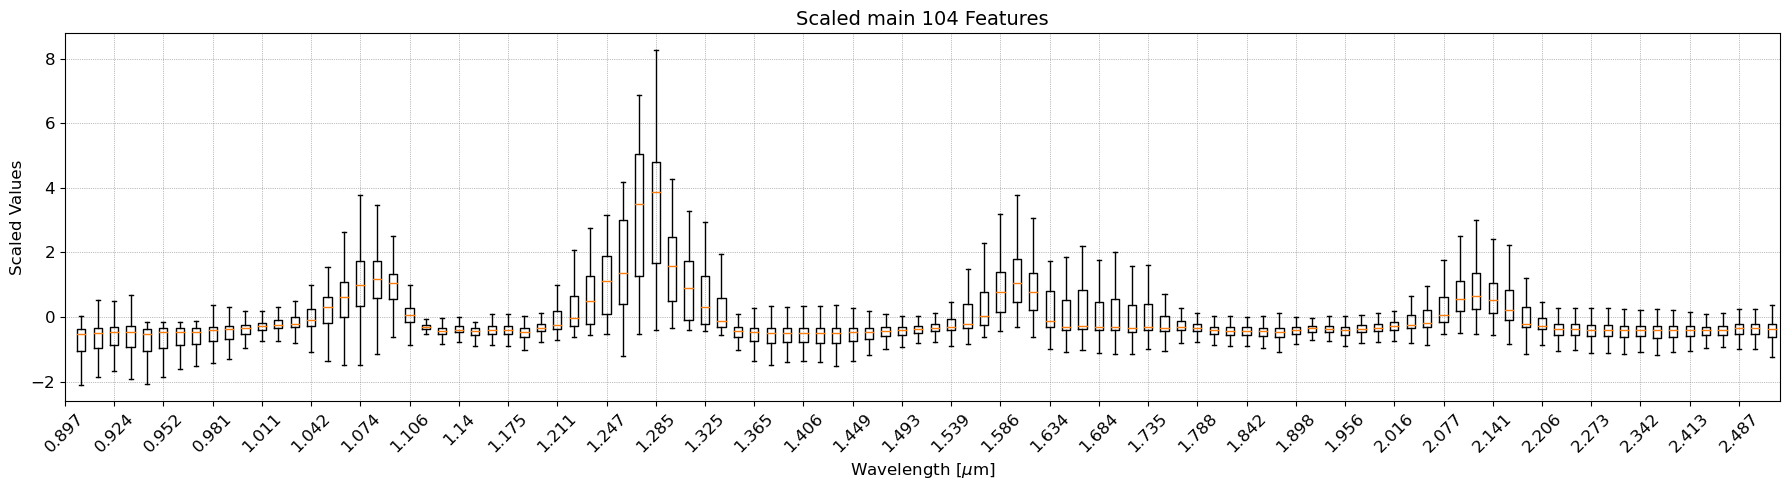

In [13]:
plot_boxplot(    
            data = data_processor.X_train_standardized_rowwise[:, ::-1],
            title='Scaled main 104 Features',
            xlabel='Wavelength [$\mu$m]',
            ylabel='Scaled Values',
            xticks_list=wavelength_names[::-1],
            fig_size=(18, 5),
            saved_file_name = 'Scaled_input_fluxes',
            __reference_data__ = __reference_data_path__,
            __save_plots__=True
    )

### 2.2.4 Standardize y Variables Column-wise 

In [14]:
# Standardize the y features using Standard Scaler
data_processor.standardize_y_column_wise(output_indicator='Trained_StandardScaler_y_ColWise')

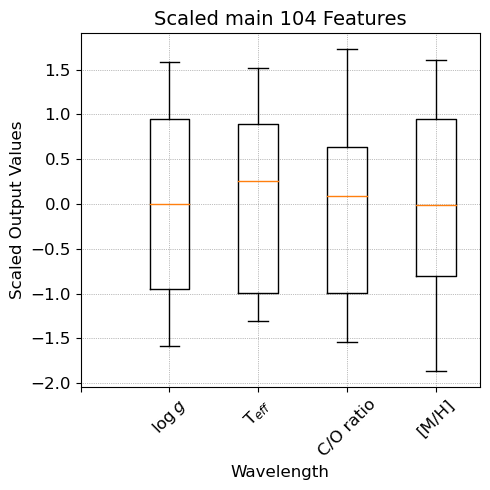

In [15]:
plot_boxplot(    
            data = data_processor.y_train_standardized_columnwise,
            title='Scaled main 104 Features',
            xlabel='Wavelength',
            ylabel='Scaled Output Values',
            xticks_list=['','$\log g$', 'T$_{eff}$', 'C/O ratio', '[M/H]'],
            fig_size=(5, 5),
            saved_file_name = 'Scaled_output_parameters',
            __reference_data__ = __reference_data_path__,
            __save_plots__=True
        )

### 2.2.5 Feature engeenering: Take Min and Max of each row (BD spectra) 

In [16]:
# train
data_processor.X_train_min = data_processor.X_train.min(axis=1)
data_processor.X_train_max = data_processor.X_train.max(axis=1)

# validation
data_processor.X_val_min = data_processor.X_val.min(axis=1)
data_processor.X_val_max = data_processor.X_val.max(axis=1)

# test
data_processor.X_test_min = data_processor.X_test.min(axis=1)
data_processor.X_test_max = data_processor.X_test.max(axis=1)

In [17]:
df_MinMax_train = pd.DataFrame((data_processor.X_train_min, data_processor.X_train_max)).T
df_MinMax_val = pd.DataFrame((data_processor.X_val_min, data_processor.X_val_max)).T
df_MinMax_test = pd.DataFrame((data_processor.X_test_min, data_processor.X_test_max)).T

In [18]:
df_MinMax_train.rename(columns={0:'min', 1:'max'}, inplace=True)
df_MinMax_val.rename(columns={0:'min', 1:'max'}, inplace=True)
df_MinMax_test.rename(columns={0:'min', 1:'max'}, inplace=True)

In [19]:
df_MinMax_train.head()

,min,max
0,8.265340e-12,3.445259e-08
1,8.080712e-22,8.397132e-14
2,2.734403e-07,8.632182e-06
3,4.414951e-16,3.373262e-10
4,3.722576e-07,6.859888e-06


### 2.2.6 Scale Min Max features - ColumnWise

In [20]:
data_processor.standardize_X_column_wise(
                                        output_indicator='Trained_StandardScaler_X_ColWise_MinMax',
                                        X_train = df_MinMax_train.to_numpy(),
                                        X_val   = df_MinMax_val.to_numpy(),
                                        X_test  = df_MinMax_test.to_numpy(),
                                        )

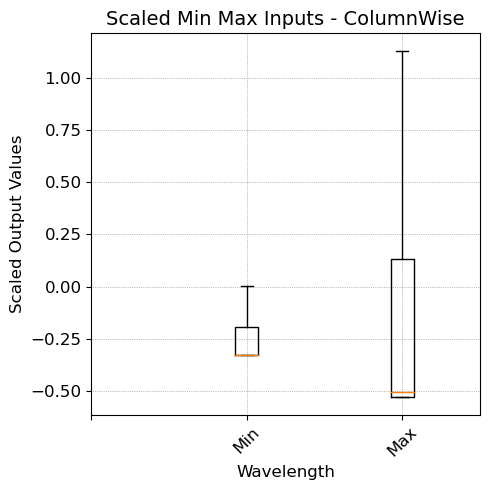

In [21]:
plot_boxplot(    
            data = data_processor.X_test_standardized_columnwise,
            title='Scaled Min Max Inputs - ColumnWise',
            xlabel='Wavelength',
            ylabel='Scaled Output Values',
            xticks_list= ['','Min','Max'],
            fig_size=(5, 5),
            saved_file_name = 'Scaled_input_Min_Max_fluxes',
            __reference_data__ = __reference_data_path__,
            __save_plots__=True
            )

---